# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [3]:
# Your code here - Manipulate column names
df.columns = [col.replace('+', '_up') for col in df.columns]
df.columns = [col.replace('½', '_half') for col in df.columns]
df.columns = [col.replace('™', 'tm') for col in df.columns]
df.columns = [col.replace(' ', '_') for col in df.columns]
df.columns = [col.replace('®', '') for col in df.columns]
df.columns = [col.replace("'", '') for col in df.columns]
df.columns = [col.replace('.', '') for col in df.columns]
df.columns = [col.replace('-', '') for col in df.columns]
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10_up,ages_1014,ages_1016,ages_1021,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [4]:
# subs = [('+', '_up'), ('½', '_half'), ('™', 'tm'), (' ', '_'), ('®', ''), 
#         ("'", ''), ('.', ''), ('-', '')]

# def replacement(col):
#     for old, new in subs:
#         col = col.replace(old, new)
#     return col

# df.columns = [replacement(col) for col in df.columns]

In [5]:
a = df.columns
a = a.drop('list_price')
a

Index(['piece_count', 'num_reviews', 'play_star_rating', 'star_rating',
       'val_star_rating', 'ages_10_up', 'ages_1014', 'ages_1016', 'ages_1021',
       'ages_1116',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=102)

In [6]:
# Your code here - Define the target and predictors
target = 'list_price'
pred = []
for i in df.columns:
    pred.append(i)
pred.remove('list_price')

In [7]:
# Your code here - Split into train and test
train, test = train_test_split(df, test_size = 0.2)
print(len(train), len(test))

8696 2174


In [8]:
# Your code here - Fit the actual model
predictors = '+'.join(pred)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     568.1
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:37:39   Log-Likelihood:                -43324.
No. Observations:                8696   AIC:                         8.684e+04
Df Residuals:                    8601   BIC:                         8.751e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.1440      1.872     33.739      0.000      59.475      66.813
piece_count                                         77.5108      0.879     88.135      0.000      75.787      79.235
num_reviews                                          6.2387      0.658      9.482      0.000       4.949       7.528
play_star_rating                                     5.4176      0.619      8.746      0.000       4.203       6.632
star_rating                                         -1.2382      0.704     -1.759      0.079      -2.619       0.142
val_star_rating                                     -8.8645      0.625    -14.192      0.000     -10.089      -7.640
ages_10_up                                         121.0808      6.635     18.250      0.000     108.075     134.086
ages_1014                                          -19.9845      8.370     -2.388      0.017     -36.391      -3.578
ages_1016                                          -14.0588      3.964     -3.546      0.000     -21.830      -6.288
ages_1021                                           57.8950      7.423      7.799      0.000      43.344      72.446
ages_1116                                          -18.0517      5.608     -3.219      0.001     -29.045      -7.058
ages_12_up                                          63.7651      5.414     11.778      0.000      53.153      74.377
ages_1216                                          -60.7513      6.523     -9.313      0.000     -73.539     -47.964
ages_14_up                                          20.1900      4.172      4.839      0.000      12.012      28.368
ages_16_up                                          24.1501      5.914      4.084      0.000      12.558      35.742
ages_1_half3                                        -8.0079      2.412     -3.320      0.001     -12.737      -3.279
ages_1_half5                                        -4.7302      2.932     -1.613      0.107     -10.477       1.017
ages_25                                             15.6291      1.669      9.364      0.000      12.357      18.901
ages_4_up                                          -17.3119      6.036     -2.868      0.004     -29.144      -5.479
ages_47                                             -6.2866      3.546     -1.773      0.076     -13.237       0.664
ages_499                                            -2.9746      3.469     -0.858      0.391      -9.774       3.825
ages_5_up                                           -8.6473      2.940     -2.942      0.003     -14.410      -2.885
ages_512                                           -32.1530      3.189    -10.082      0.000     -38.404     -25.902
ages_58                                  

In [9]:
# summary = model.summary()
# p_table = summary.tables[1]
# p_table = pd.DataFrame(p_table.data)
# p_table.columns = p_table.iloc[0]
# p_table = p_table.drop(0)
# p_table = p_table.set_index(p_table.columns[0])
# p_table['P>|t|'] = p_table['P>|t|'].astype(float)
# x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
# x_cols.remove('Intercept')
# print(len(p_table), len(x_cols))
# print(x_cols[:5])
# p_table.head()

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [10]:
# Your code here - Remove features which do not appear to be statistically relevant
t = ['ages_1_half5', 'ages_47', 'ages_499', 'ages_58', 'ages_614', 'ages_7_up', 'ages_916', 'theme_name_Angry_Birdstm', 'theme_name_Creator_3in1', 'theme_name_DC_Super_Hero_Girls', 'theme_name_DUPLO', 'theme_name_Elves', 'theme_name_Friends', 'theme_name_Juniors', 'theme_name_NEXO_KNIGHTStm', 'theme_name_Power_Functions', 'theme_name_Pteranodon_Chase', 'theme_name_Speed_Champions', 'theme_name_Technic', 'country_AT', 'country_AU', 'country_CH', 'country_GB', 'country_IE', 'country_IT', 'review_difficulty_Very_Easy', 'review_difficulty_unknown']
pred2 = pred
for i in t:
    pred2.remove(i)

In [11]:
# Your code here - Refit the model
predictors = '+'.join(pred2)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     721.9
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:37:39   Log-Likelihood:                -43331.
No. Observations:                8696   AIC:                         8.681e+04
Df Residuals:                    8621   BIC:                         8.734e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.0070      1.594     40.157      0.000      60.882      67.131
piece_count                                         77.4697      0.864     89.640      0.000      75.776      79.164
num_reviews                                          6.3244      0.652      9.705      0.000       5.047       7.602
play_star_rating                                     5.5473      0.606      9.156      0.000       4.360       6.735
star_rating                                         -1.2121      0.689     -1.760      0.078      -2.562       0.138
val_star_rating                                     -8.8211      0.595    -14.829      0.000      -9.987      -7.655
ages_10_up                                         125.7466      7.450     16.878      0.000     111.142     140.351
ages_1014                                          -16.3257      8.647     -1.888      0.059     -33.276       0.625
ages_1016                                           -9.8754      3.712     -2.660      0.008     -17.152      -2.599
ages_1021                                           62.9693      8.036      7.836      0.000      47.217      78.722
ages_1116                                          -13.7950      5.380     -2.564      0.010     -24.342      -3.248
ages_12_up                                          68.1146      6.268     10.867      0.000      55.828      80.401
ages_1216                                          -56.4464      6.809     -8.290      0.000     -69.794     -43.099
ages_14_up                                          24.0195      4.734      5.074      0.000      14.740      33.299
ages_16_up                                          27.7860      6.577      4.225      0.000      14.894      40.678
ages_1_half3                                        -1.0047      3.100     -0.324      0.746      -7.082       5.073
ages_25                                             22.2386      1.940     11.463      0.000      18.436      26.041
ages_4_up                                          -15.4389      9.248     -1.669      0.095     -33.568       2.690
ages_5_up                                           -7.4082      2.858     -2.592      0.010     -13.011      -1.805
ages_512                                           -28.2878      2.599    -10.886      0.000     -33.382     -23.194
ages_6_up                                          -21.3410      5.328     -4.006      0.000     -31.784     -10.898
ages_612                                           -15.7364      1.852     -8.496      0.000     -19.367     -12.106
ages_712                                           -15.1466      2.177     -6.959      0.000     -19.413     -10.880
ages_714                                 

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [12]:
# Your code here - Continue to refine the model
t = ['ages_1_half3', 'ages_4_up', 'theme_name_Jurassic_Park_Velociraptor_Chase', 
     'theme_name_MINDSTORMS', 'country_BE', 'country_FR', 'country_PT', 
     'review_difficulty_Easy', 'review_difficulty_Very_Challenging']

pred3 = pred2
for i in t:
    pred3.remove(i)
    
predictors = '+'.join(pred3)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     820.7
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:37:39   Log-Likelihood:                -43340.
No. Observations:                8696   AIC:                         8.681e+04
Df Residuals:                    8630   BIC:                         8.728e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.9606      1.348     48.187      0.000      62.318      67.603
piece_count                                         77.6758      0.859     90.471      0.000      75.993      79.359
num_reviews                                          5.6363      0.600      9.392      0.000       4.460       6.813
play_star_rating                                     5.5970      0.601      9.316      0.000       4.419       6.775
star_rating                                         -1.3156      0.684     -1.922      0.055      -2.657       0.026
val_star_rating                                     -8.7158      0.591    -14.756      0.000      -9.874      -7.558
ages_10_up                                         114.8806      4.703     24.428      0.000     105.662     124.099
ages_1014                                          -15.7160      8.633     -1.821      0.069     -32.638       1.206
ages_1016                                           -9.0710      3.666     -2.475      0.013     -16.257      -1.885
ages_1021                                           48.0323      3.139     15.300      0.000      41.879      54.186
ages_1116                                          -13.0102      5.348     -2.433      0.015     -23.494      -2.527
ages_12_up                                          64.7018      5.812     11.133      0.000      53.310      76.094
ages_1216                                          -55.4320      6.776     -8.180      0.000     -68.715     -42.149
ages_14_up                                          27.0003      4.383      6.160      0.000      18.408      35.592
ages_16_up                                          29.2839      6.472      4.525      0.000      16.597      41.971
ages_25                                             22.4923      1.859     12.101      0.000      18.849      26.136
ages_5_up                                           -7.3426      2.836     -2.589      0.010     -12.901      -1.784
ages_512                                           -27.7869      2.540    -10.941      0.000     -32.765     -22.809
ages_6_up                                          -20.7107      5.287     -3.918      0.000     -31.074     -10.348
ages_612                                           -15.0401      1.751     -8.589      0.000     -18.473     -11.607
ages_712                                           -14.5757      2.078     -7.013      0.000     -18.650     -10.502
ages_714                                           -10.8782      1.846     -5.892      0.000     -14.497      -7.259
ages_8_up                                           14.9682      4.382      3.416      0.001       6.379      23.557
ages_812                                 

In [13]:
# summary = model.summary()
# p_table = summary.tables[1]
# p_table = pd.DataFrame(p_table.data)
# p_table.columns = p_table.iloc[0]
# p_table = p_table.drop(0)
# p_table = p_table.set_index(p_table.columns[0])
# p_table['P>|t|'] = p_table['P>|t|'].astype(float)
# x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
# x_cols.remove('Intercept')
# print(len(p_table), len(x_cols))
# print(x_cols[:5])
# p_table.head()

In [14]:
# Your code here - Refit the model
t = ['country_DE', 'country_ES']

pred4 = pred3
for i in t:
    pred4.remove(i)
    
predictors = '+'.join(pred4)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     846.8
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:37:39   Log-Likelihood:                -43341.
No. Observations:                8696   AIC:                         8.681e+04
Df Residuals:                    8632   BIC:                         8.726e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.3002      1.323     49.363      0.000      62.707      67.893
piece_count                                         77.6759      0.859     90.473      0.000      75.993      79.359
num_reviews                                          5.6360      0.600      9.392      0.000       4.460       6.812
play_star_rating                                     5.5873      0.601      9.301      0.000       4.410       6.765
star_rating                                         -1.3132      0.684     -1.919      0.055      -2.655       0.028
val_star_rating                                     -8.7108      0.591    -14.749      0.000      -9.868      -7.553
ages_10_up                                         114.8686      4.703     24.427      0.000     105.650     124.087
ages_1014                                          -15.7438      8.633     -1.824      0.068     -32.666       1.178
ages_1016                                           -9.0996      3.665     -2.483      0.013     -16.285      -1.914
ages_1021                                           48.0216      3.139     15.298      0.000      41.868      54.175
ages_1116                                          -13.0570      5.348     -2.442      0.015     -23.540      -2.574
ages_12_up                                          64.7123      5.812     11.135      0.000      53.320      76.104
ages_1216                                          -55.4162      6.776     -8.178      0.000     -68.699     -42.133
ages_14_up                                          26.9787      4.383      6.155      0.000      18.387      35.571
ages_16_up                                          29.3026      6.472      4.528      0.000      16.616      41.989
ages_25                                             22.4756      1.859     12.093      0.000      18.832      26.119
ages_5_up                                           -7.3578      2.836     -2.595      0.009     -12.916      -1.799
ages_512                                           -27.8083      2.539    -10.950      0.000     -32.786     -22.830
ages_6_up                                          -20.7300      5.287     -3.921      0.000     -31.093     -10.367
ages_612                                           -15.0533      1.751     -8.597      0.000     -18.486     -11.621
ages_712                                           -14.5784      2.078     -7.014      0.000     -18.652     -10.504
ages_714                                           -10.8982      1.846     -5.904      0.000     -14.517      -7.280
ages_8_up                                           14.9915      4.382      3.421      0.001       6.403      23.580
ages_812                                 

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [15]:
# Your code here - Code a way to identify multicollinearity
X = df[pred4]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
a = list(zip(pred4, vif))
print(len(vif))

C:\Users\zazue\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


64


## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [16]:
# Your code here - Subset features based on multicollinearity
t = []
for i in range(len(a)):
    if a[i][1] > 5:
        t.append(a[i][0])

print(len(t))

7


In [17]:
# Your code here - Refit model with subset features
pred5 = pred4
for i in t:
    pred5.remove(i)

predictors = '+'.join(pred5)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     855.8
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:37:44   Log-Likelihood:                -43676.
No. Observations:                8696   AIC:                         8.747e+04
Df Residuals:                    8638   BIC:                         8.788e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.6751      1.096     61.722      0.000      65.526      69.824
piece_count                                         79.1086      0.668    118.401      0.000      77.799      80.418
num_reviews                                          3.9561      0.584      6.770      0.000       2.811       5.102
play_star_rating                                     6.7926      0.540     12.588      0.000       5.735       7.850
star_rating                                         -2.4190      0.688     -3.516      0.000      -3.767      -1.070
val_star_rating                                     -9.4710      0.610    -15.527      0.000     -10.667      -8.275
ages_1014                                          -32.8777      8.868     -3.707      0.000     -50.261     -15.494
ages_1016                                          -16.5612      3.528     -4.694      0.000     -23.477      -9.645
ages_1021                                           45.2505      3.205     14.118      0.000      38.968      51.533
ages_1116                                          -23.6959      5.161     -4.592      0.000     -33.812     -13.580
ages_1216                                          -67.7956      6.530    -10.383      0.000     -80.596     -54.996
ages_14_up                                           7.7370      3.661      2.113      0.035       0.560      14.914
ages_25                                             20.2959      1.800     11.274      0.000      16.767      23.825
ages_512                                           -31.5252      2.563    -12.301      0.000     -36.549     -26.502
ages_6_up                                          -24.3526      5.439     -4.478      0.000     -35.013     -13.692
ages_612                                           -20.3304      1.651    -12.313      0.000     -23.567     -17.094
ages_712                                           -18.9789      2.024     -9.376      0.000     -22.947     -15.011
ages_714                                           -15.4534      1.779     -8.687      0.000     -18.941     -11.966
ages_8_up                                            2.1422      4.394      0.488      0.626      -6.471      10.756
ages_812                                           -19.0266      2.527     -7.530      0.000     -23.979     -14.074
ages_814                                           -16.6919      1.867     -8.941      0.000     -20.351     -13.032
ages_9_up                                           16.7840      9.554      1.757      0.079      -1.943      35.511
ages_912                                           -28.5653      6.185     -4.618      0.000     -40.690     -16.441
ages_914                                 

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

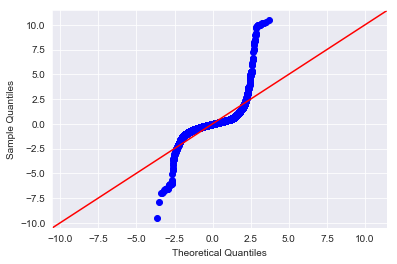

In [18]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

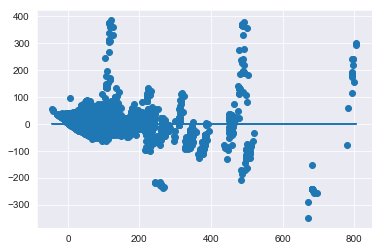

In [19]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[pred4]), model.resid)
plt.plot(model.predict(train[pred4]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [20]:
# Your code here - Check for outliers
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, train.list_price.quantile(q=q)))

0.9 percentile: 146.339
0.91 percentile: 157.16449499999962
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 202.98513
0.95 percentile: 226.26395
0.96 percentile: 252.5683999999968
0.97 percentile: 292.7878
0.98 percentile: 356.3700000000014


In [21]:
# Your code here
# Remove extreme outliers
subset = train[train.list_price < 200]
print('Percent removed:',(len(train) - len(subset))/len(train))
outcome = 'list_price'
x_cols = pred4
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

# Rerun the model

Percent removed: 0.060257589696412144


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1002.
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:37:45   Log-Likelihood:                -33391.
No. Observations:                8172   AIC:                         6.690e+04
Df Residuals:                    8114   BIC:                         6.730e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           61.0826      0.528    115.697      0.000      60.048      62.118
piece_count                                         76.8241      0.670    114.669      0.000      75.511      78.137
num_reviews                                          0.2399      0.299      0.803      0.422      -0.346       0.826
play_star_rating                                     3.2445      0.217     14.923      0.000       2.818       3.671
star_rating                                         -0.8820      0.273     -3.231      0.001      -1.417      -0.347
val_star_rating                                     -4.5847      0.243    -18.895      0.000      -5.060      -4.109
ages_1014                                            0.2188      3.508      0.062      0.950      -6.657       7.095
ages_1016                                            2.1631      1.536      1.408      0.159      -0.848       5.174
ages_1021                                           30.6414      1.328     23.070      0.000      28.038      33.245
ages_1116                                          -57.9887      3.114    -18.623      0.000     -64.093     -51.885
ages_1216                                            3.1581      4.608      0.685      0.493      -5.875      12.191
ages_14_up                                         -13.8077      2.951     -4.680      0.000     -19.592      -8.024
ages_25                                             24.8418      0.712     34.902      0.000      23.447      26.237
ages_512                                           -25.9329      1.034    -25.088      0.000     -27.959     -23.907
ages_6_up                                          -25.6129      2.156    -11.880      0.000     -29.839     -21.387
ages_612                                           -11.2152      0.662    -16.934      0.000     -12.513      -9.917
ages_712                                            -7.7881      0.811     -9.603      0.000      -9.378      -6.198
ages_714                                            -8.3349      0.710    -11.747      0.000      -9.726      -6.944
ages_8_up                                           11.5265      1.867      6.172      0.000       7.866      15.187
ages_812                                            -5.5917      1.027     -5.445      0.000      -7.605      -3.579
ages_814                                            -0.6955      0.786     -0.885      0.376      -2.237       0.846
ages_9_up                                            8.1794      3.797      2.154      0.031       0.736      15.623
ages_912                                           -12.5126      2.454     -5.098      0.000     -17.324      -7.701
ages_914                                 

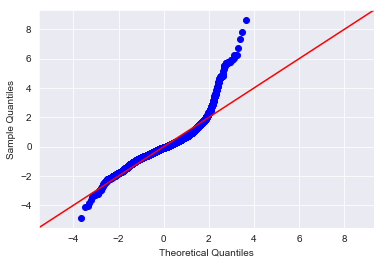

In [22]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

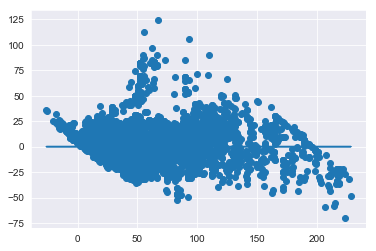

In [23]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(subset[pred4]), model.resid)
plt.plot(model.predict(subset[pred4]), [0 for i in range(len(subset))])

In [24]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 